<a href="https://colab.research.google.com/github/saraelhishi/covid-research/blob/main/Visualization_after_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Generating Plots </h1>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import string
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
import requests
import folium
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from tqdm import tqdm, notebook
from collections import Counter
from textblob import TextBlob

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

sns.set()

In [ ]:
# reading data
df_total=pd.read_csv("after-sentiment/vaccine-aws-prepared.csv")
df_total.head()

,created_at,id,source,text,user_location,text_clean,text_lemma,text_lemma1,sent,polarity,subjectivity,date,month,year,country,city
0,2020-04-19 03:08:09,1.250000e+18,"<a href=""http://twitter.com/download/iphone"" r...","RT @leapsmag: Today, Jennifer Haller, a health...","KayHell, Marehshia",today jennifer haller healthy mother two perso...,"['today', 'jennifer', 'haller', 'healthy', 'mo...",today jennifer haller healthy mother two perso...,neutral,0.250000,0.750000,2020-04-19,4,2020,Marehshia,KayHell
1,2020-04-18 11:44:46,1.250000e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @atrupar: INGRAHAM: We don't have a vaccine...,"Virginia, USA",ingraham vaccine sars hiv life went right fauc...,"['ingraham', 'vaccine', 'sars', 'hiv', 'life',...",ingraham vaccine sars hiv life right fauci hiv...,neutral,0.295238,0.645238,2020-04-18,4,2020,USA,Virginia
2,2020-04-28 03:12:46,1.250000e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @RealCandaceO: This is your daily reminder ...,"Crofton, MD",daily reminder circumstances getting vaccine a...,"['daily', 'reminder', 'circumstance', 'get', '...",daily reminder circumstance get vaccine available,neutral,0.200000,0.200000,2020-04-28,4,2020,USA,Crofton
3,2020-04-20 04:17:57,1.250000e+18,"<a href=""http://twitter.com/download/iphone"" r...","RT @techsupremo: Until a vaccine is found, hum...","Tangkak, Johor",vaccine found humanity adapt new normal,"['vaccine', 'find', 'humanity', 'adapt', 'new'...",vaccine find humanity adapt new normal,neutral,0.143182,0.552273,2020-04-20,4,2020,Johor,Tangkak
4,2020-04-19 00:13:28,1.250000e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @PeterKolchinsky: I’m a virologist &amp; in...,"Pays de Galles, Royaume-Uni",virologist amp investor amp hearing people imp...,"['virologist', 'amp', 'investor', 'amp', 'hear...",virologist amp investor amp hear people imposs...,neutral,-0.083333,0.812500,2020-04-19,4,2020,Royaume-Uni,Pays de Galles


In [ ]:
df_total.columns

Index(['created_at', 'id', 'source', 'text', 'user_location', 'text_clean',
       'text_lemma', 'text_lemma1', 'sent', 'polarity', 'subjectivity', 'date',
       'month', 'year', 'country', 'city'],
      dtype='object')

<h2>Subjectivity vs. Ploarity</h2>

In [ ]:
def calcualte_percentage(part, total):
    score= (part*100)/total
    return score

In [ ]:
# calcuate percentage of subjectivity more to less
count_sub=0
count_obj=0
#count_neither=0
for tweet_subjectivity in df_total['subjectivity']:
    if tweet_subjectivity >= 0.5:
        count_sub += 1
#     elif tweet_subjectivity == 0.5:
#         count_neither += 1
    elif tweet_subjectivity < 0.5:
        count_obj += 1
sub_precent= calcualte_percentage(count_sub, len(df_total))
obj_percent= calcualte_percentage(count_obj, len(df_total))
#neither_percent= calcualte_percentage(count_neither, len(df_total))

print("subjectivity: ", format(sub_precent, '.2f'), " %")
print("Objectivity: ", format(obj_percent,'.2f'), " %")
#print("In between: ", format(neither_percent,'.2f'), " %")

subjectivity:  36.76  %
Objectivity:  63.24  %


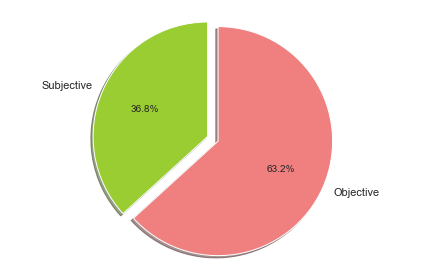

In [ ]:
# Plot pie
labels = 'Subjective', 'Objective'
sizes = [sub_precent, obj_percent]

plt.pie(sizes, labels=labels, explode= (0,0.1),
        colors=['yellowgreen', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=90)
#plt.title("Objective vs. Subjective Tweets \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.savefig("plots//Objective vs. Subjective Tweets.jpeg", dpi=600)
plt.show()


<h2>Sentiment</h2>

In [ ]:
#Function for count_values_in single columns
def count_values_in_column(data, feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage= round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])

# count values for sentiment
count_values_in_column(df_total,'sent')

,Total,Percentage
neutral,99570,55.11
negative,65251,36.11
positive,13001,7.20
mixed,2862,1.58


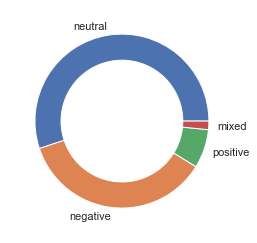

In [ ]:
# create data for Pie Chart
pichart=count_values_in_column(df_total,'sent')
names=pichart.index
size=pichart['Percentage']

# Create a circle for the center of the plot
circle=plt.Circle((0,0), 0.7, color="white")
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(circle)
plt.savefig("plots//sentiment pie.png")
plt.show()

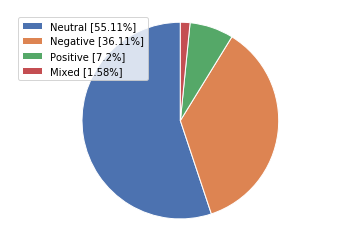

In [ ]:
labels=['Neutral ['+str(pichart['Percentage'][0])+'%]', 'Negative ['+str(pichart['Percentage'][1])+'%]', 'Positive ['+str(pichart['Percentage'][2])+'%]','Mixed ['+str(pichart['Percentage'][3])+'%]']
sizes=pichart['Percentage']

patches, texts = plt.pie(sizes, startangle=90)
plt.style.use('default')
plt.legend(labels)
#plt.title("Sentiment Analysis Result")
plt.axis('equal')
plt.savefig("plots//sentiment pie chart with legend.jpeg", dpi=600)
plt.show()

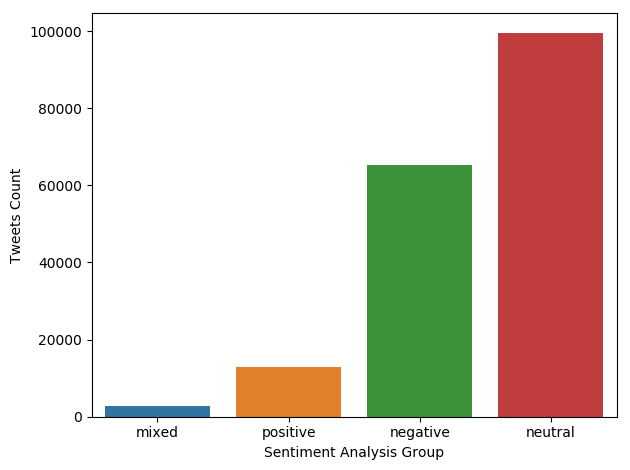

In [ ]:
# sentiment count counts
order = df_total.sent.value_counts(ascending=True).index
#plt.figure(figsize=(10,6))
ax = sns.countplot(x='sent', data=df_total, order= order)
ax.set(xlabel="Sentiment Analysis Group", ylabel = "Tweets Count")
plt.tight_layout()
plt.savefig('plots//sentiment count.jpeg', dpi=600)

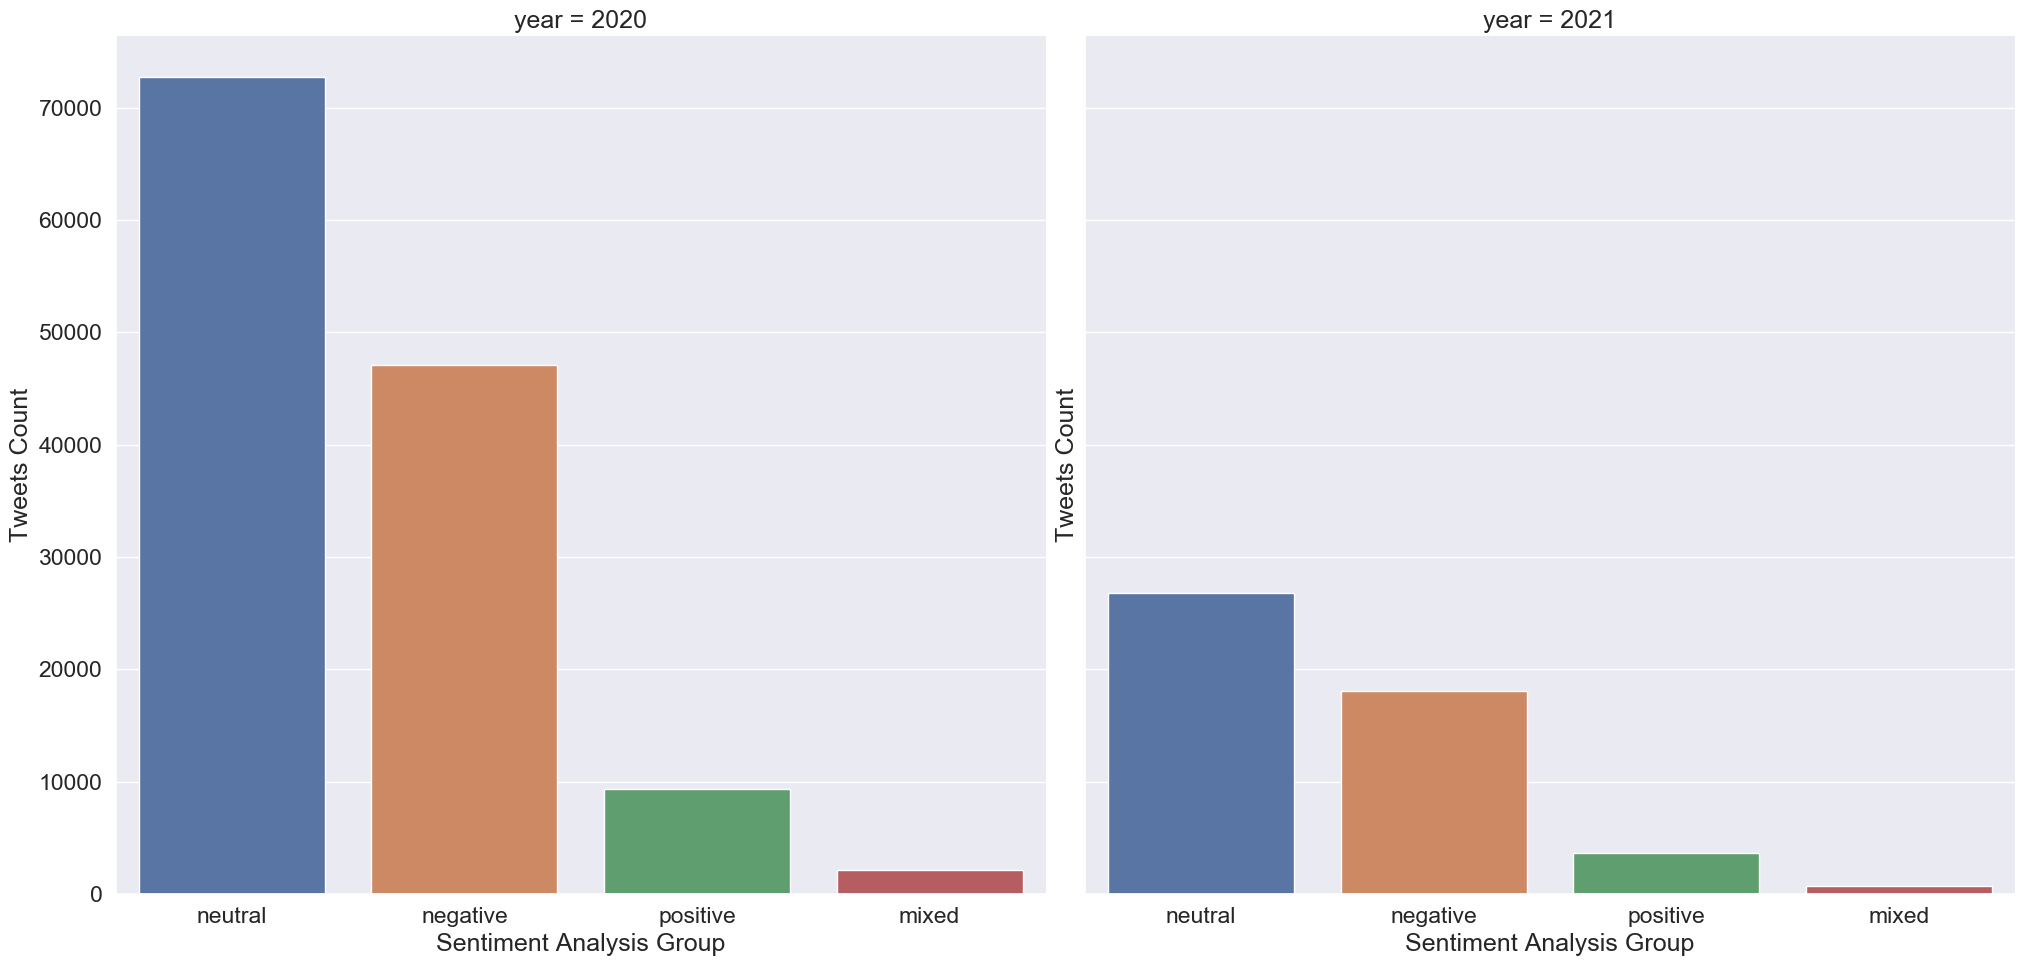

In [ ]:
#subgraphs for sentiment for each year
sns.set(font_scale=1.5)
ax= sns.catplot(data=df_total, x='sent', col="year", col_wrap=3, sharex=False, height=10, kind='count')
ax.set(xlabel="Sentiment Analysis Group", ylabel = "Tweets Count")
plt.savefig('plots//sentiment by year.jpeg', dpi=600)

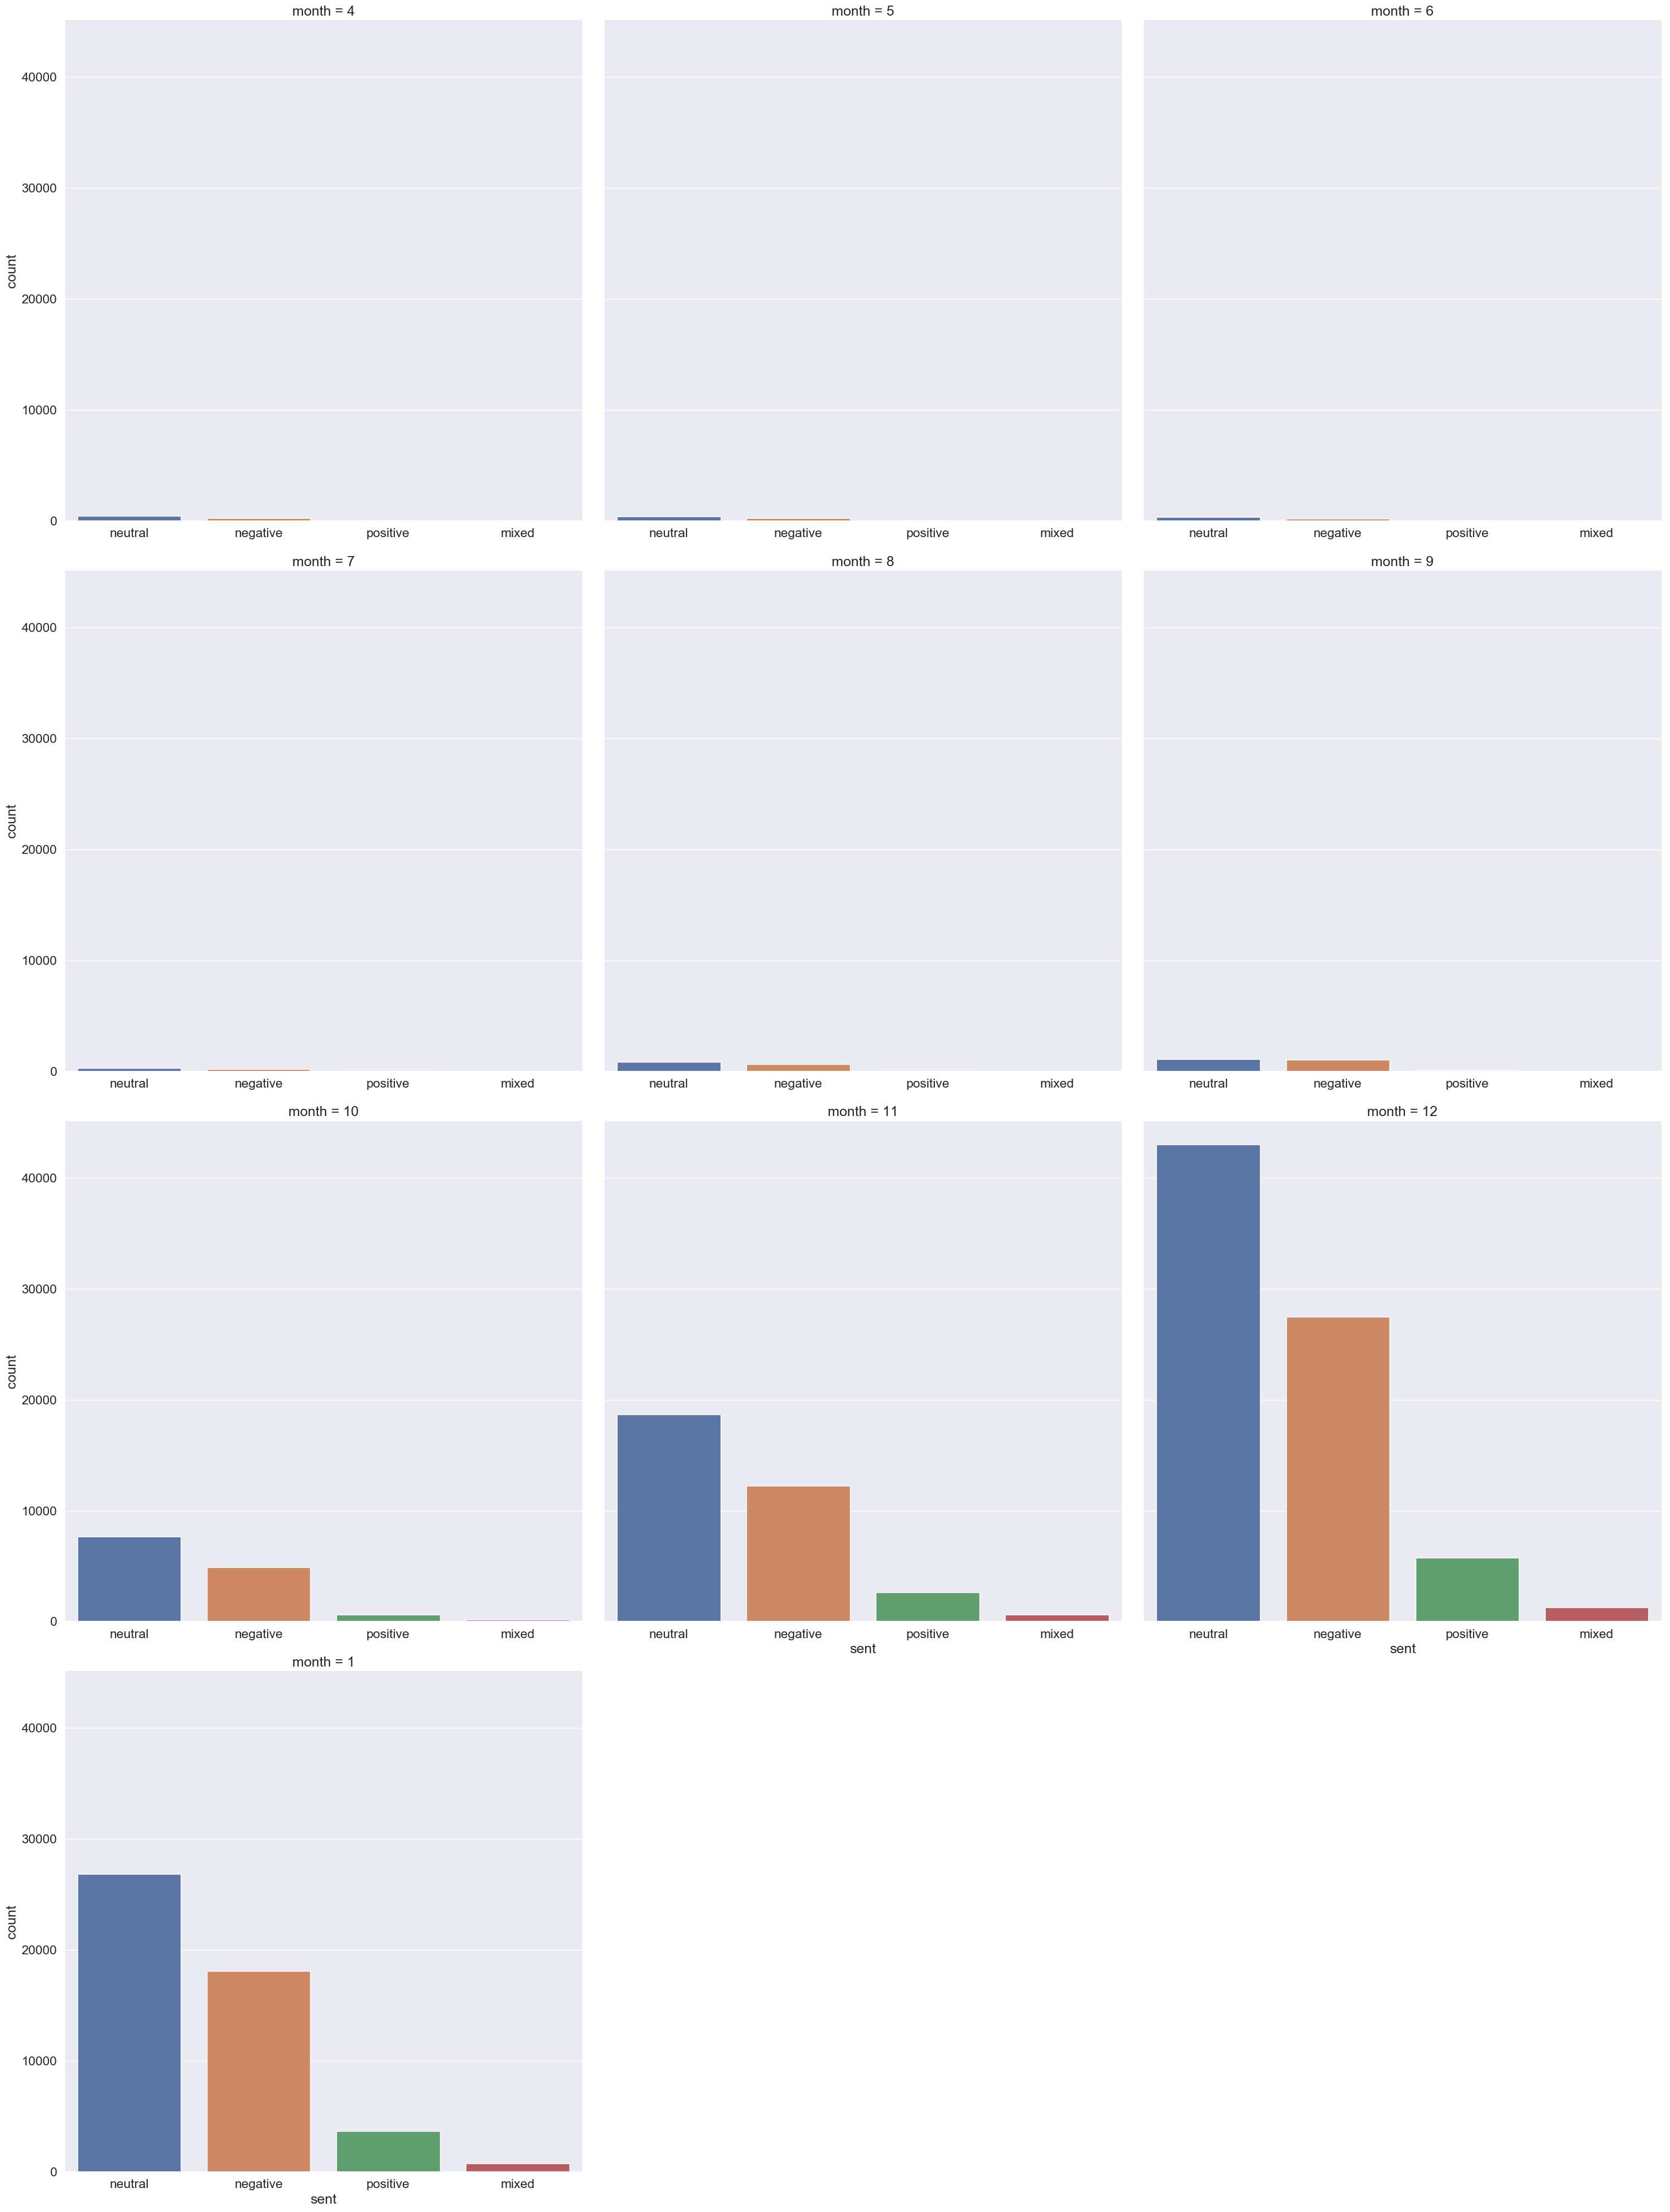

In [ ]:
#subgraphs for sentiment for each month
sns.set(font_scale=1.5)
sns.catplot(data=df_total, x='sent', col='month', col_wrap=3, sharex=False, height=10, kind='count', col_order=[4,5,6,7,8,9,10,11,12,1])
plt.savefig('plots//sentiment by month.png')

In [ ]:
df_total['mont_name']= pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)
df_total['month_name'].head()

0    Apr
1    Apr
2    Apr
3    Apr
4    Apr
Name: month_name, dtype: object

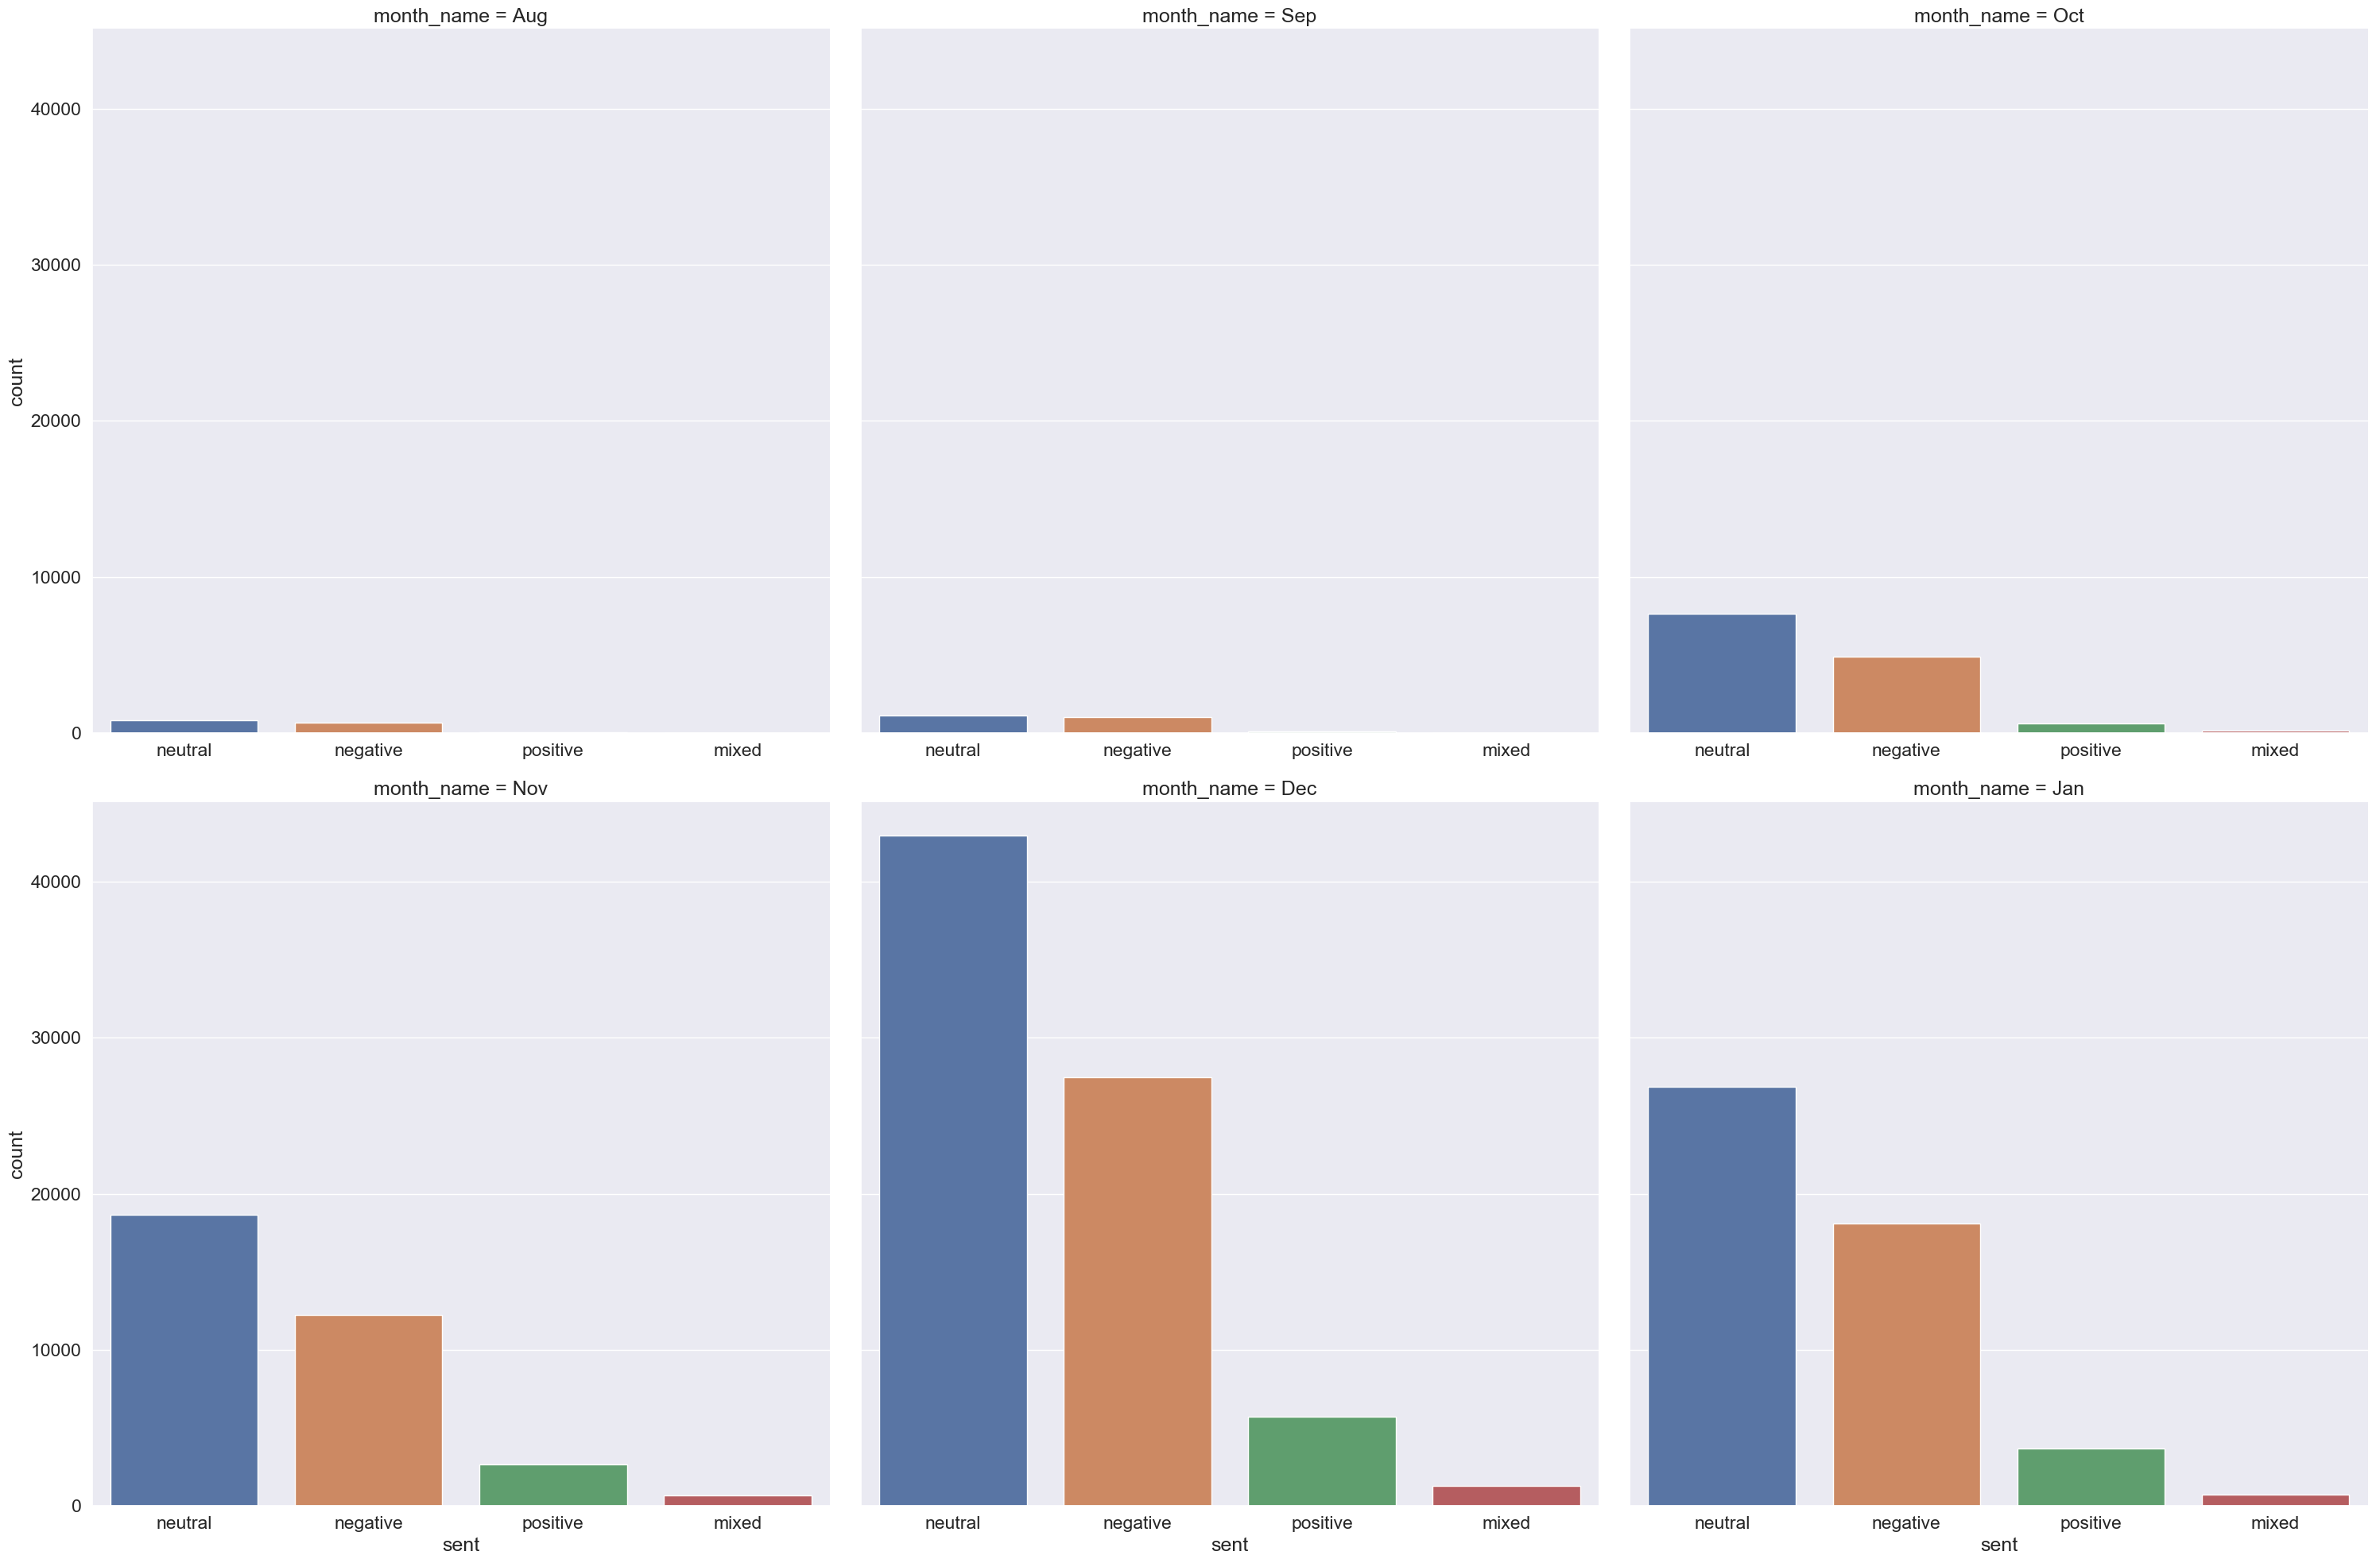

In [ ]:
#subgraphs for sentiment by month from Oct
sns.set(font_scale=1.5)
sns.catplot(data=df_total, x='sent', col='month_name', col_wrap=3, sharex=False, height=10, kind='count', col_order=['Aug', 'Sep', 'Oct','Nov','Dec','Jan'])
plt.savefig('plots//sentiment by month start from Aug.jpeg', dpi=600)

<h2>Hashtags</h>

<h2>Top Words</h2>

In [ ]:

common_100 = Counter(" ".join(df_total["text_lemma1"]).split()).most_common(100)
df_common_100 = pd.DataFrame(common_100, columns=['word','occurrence'])

In [ ]:
df_common_100.head(10)

,word,occurrence
0,vaccine,197937
1,covid,46715
2,people,17966
3,get,17208
4,not,17145
5,say,13891
6,pfizer,12055
7,dose,10935
8,need,10500
9,amp,9491


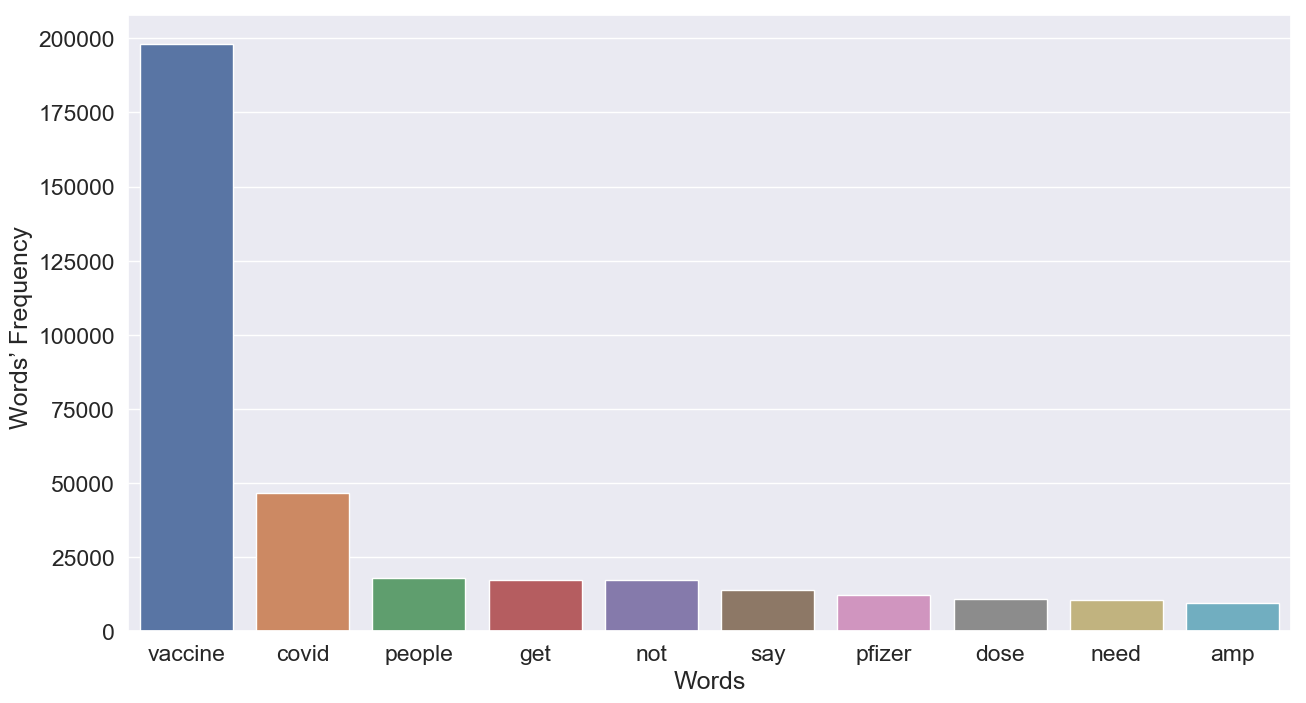

In [ ]:
# bar plot
plt.figure(figsize=(15,8))
ax= sns.barplot(x="word", y="occurrence", data=df_common_100.head(10))
#plt.title('\n Top 10 Words', fontsize=16, color='Black')
ax.set(xlabel="Words", ylabel = "Words’ Frequency ")
plt.savefig('plots//Top 10 words.jpeg', dpi=600)
plt.show()

<h2>Top 10 Bigrams</h2>

In [ ]:
def seq_ngrams(xs, n):
    return [xs[i:i+n] for i in range(len(xs)-n+1)]

In [ ]:
# Top Biagrams
def shingle(text, w):
    tokens = " ".join(text).split()
    return [' '.join(xs) for xs in seq_ngrams(tokens, w)]

In [ ]:
words = shingle(df_total['text_lemma1'],2)

In [ ]:
bigrams= pd.DataFrame(words)
bigrams_top10= pd.DataFrame(Counter(bigrams[0]).most_common(10), columns=['bigram','occurrence'])

In [ ]:
bigrams_top10

,bigram,occurrence
0,covid vaccine,34468
1,coronavirus vaccine,5665
2,get vaccine,5418
3,pfizer vaccine,4055
4,vaccine rollout,2441
5,vaccine dose,2264
6,vaccine vaccine,2256
7,flu vaccine,2223
8,vaccine distribution,2213
9,take vaccine,2095


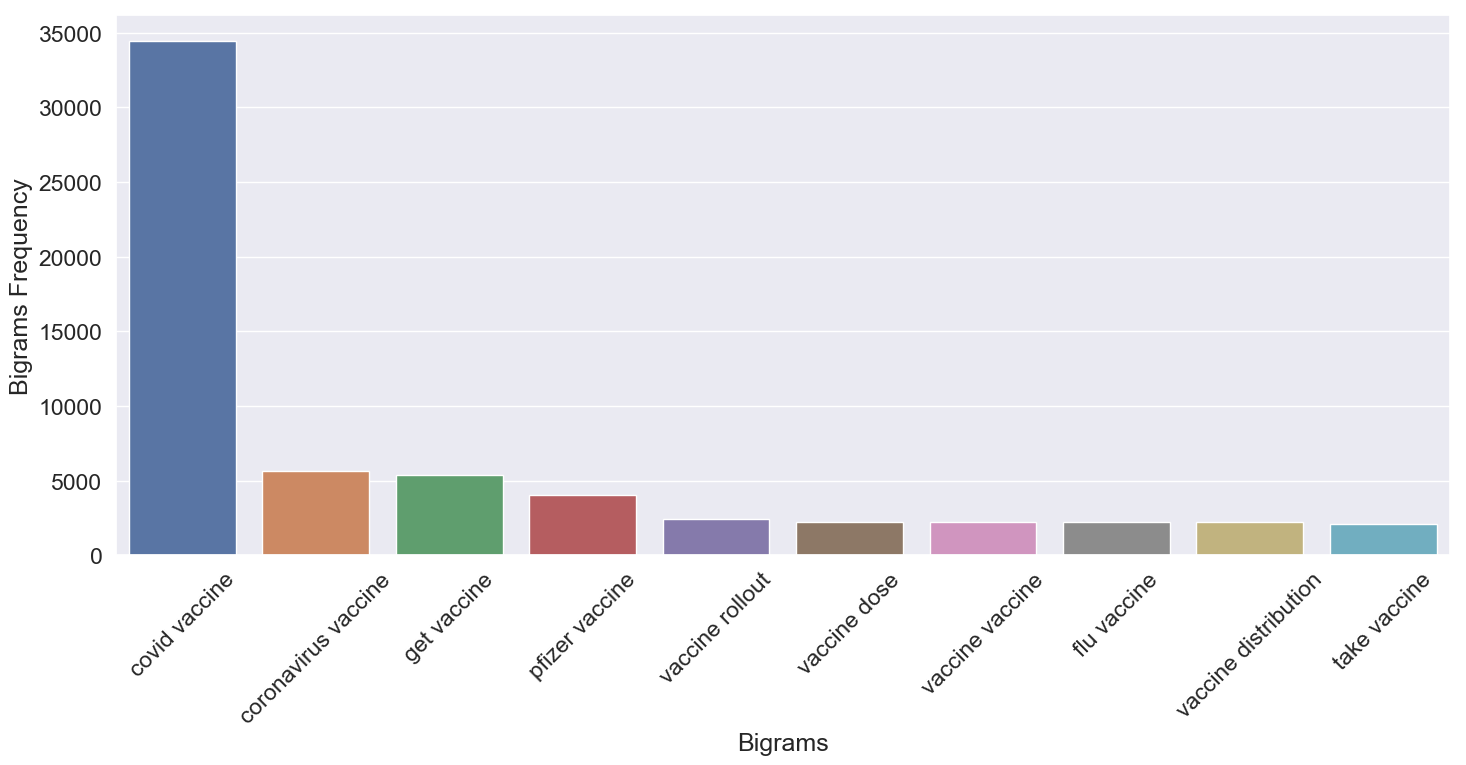

In [ ]:
# bar plot
plt.figure(figsize=(15,8))
g= sns.barplot(x="bigram", y="occurrence", data=bigrams_top10.head(10))
for item in g.get_xticklabels():
    item.set_rotation(45)
#plt.title('\n Top 10 Bigrams', fontsize=16, color='Black')
g.set(xlabel='Bigrams', ylabel='Bigrams Frequency')
plt.tight_layout()
plt.savefig('plots//Top 10 Bigrams.jpeg', dpi=600)
plt.show()

<h2>Location</h2>

In [ ]:
# Taking top 100 countries and cities excluding the unknown at index 0
top100_count = df_total.country.value_counts(sort=True, ascending=False)[1:101]
top100_count = pd.DataFrame(top100_count)

top100_city= df_total.city.value_counts(sort=True, ascending=False)[1:101]
top100_city= pd.DataFrame(top100_city)

In [ ]:
def get_coordinates(input_type, name, output_as='center'):
    """
    Function to get coordinates of country/ city

    Attributes
    ----------
    input_type : str
        Pass 'country' or 'city' to generate the respective URL
    name : str
        Name of the country or city we need the coordinates for
    output_as : str
        Pass 'center' or 'boundingbox' depending upon what coordinates type to fetch
    Methods
    -------
        Returns the coordinates of the country or city
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?'+input_type+'='\
                             ,name,'&format=json&polygon=0')
    response = requests.get(url)
    try:
        response = response.json()[0]
        # parse response to list
        if output_as == 'center':
            lst = [response.get(key) for key in ['lat','lon']]
            output = [float(i) for i in lst]
        if output_as == 'boundingbox':
            lst = response[output_as]
            output = [float(i) for i in lst]
        return output
    
    except (IndexError, ValueError):
        # this will log the whole traceback
        return [0,0]

In [ ]:
# Get the latitudes and longitudes for the top 100 countries and cities
lat_long_count = [get_coordinates("country",coun) for coun in top100_count.index]
lat_long_city = [get_coordinates("city",city) for city in top100_city.index]

In [ ]:
def top100_df(input_type,df,lat_long):
    # merge lat and long with original dataframe
    for i, pair in zip(df.index, lat_long):
        df.loc[i,'lat'] = pair[0]
        df.loc[i,'long'] = pair[1] 
    # reset the index as country names
    df.reset_index(level=0, inplace=True)
    if input_type=="country":
        df.rename(columns={"country":"# of tweets","index":"country"}, inplace=True)
    elif input_type=="city":
        df.rename(columns={"city":"# of tweets","index":"city"}, inplace=True)
    # drop the countries/ cities with unidetified and duplicated latitudes and longitudes
    df.drop_duplicates(subset=['lat','long'],inplace=True)
    return df

In [ ]:
# Call the top100_df() to finalize the country and city dataframes 
top100_count = top100_df("country",top100_count,lat_long_count)
top100_city = top100_df("city",top100_city,lat_long_city)

In [ ]:
top100_count.head()

,country,# of tweets,lat,long
0,England,7127,0.000000,0.000000
1,India,5574,22.351115,78.667743
2,United Kingdom,3535,54.702354,-3.276575
3,Canada,3468,61.066692,-107.991707
5,South Africa,1962,-28.816624,24.991639


C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


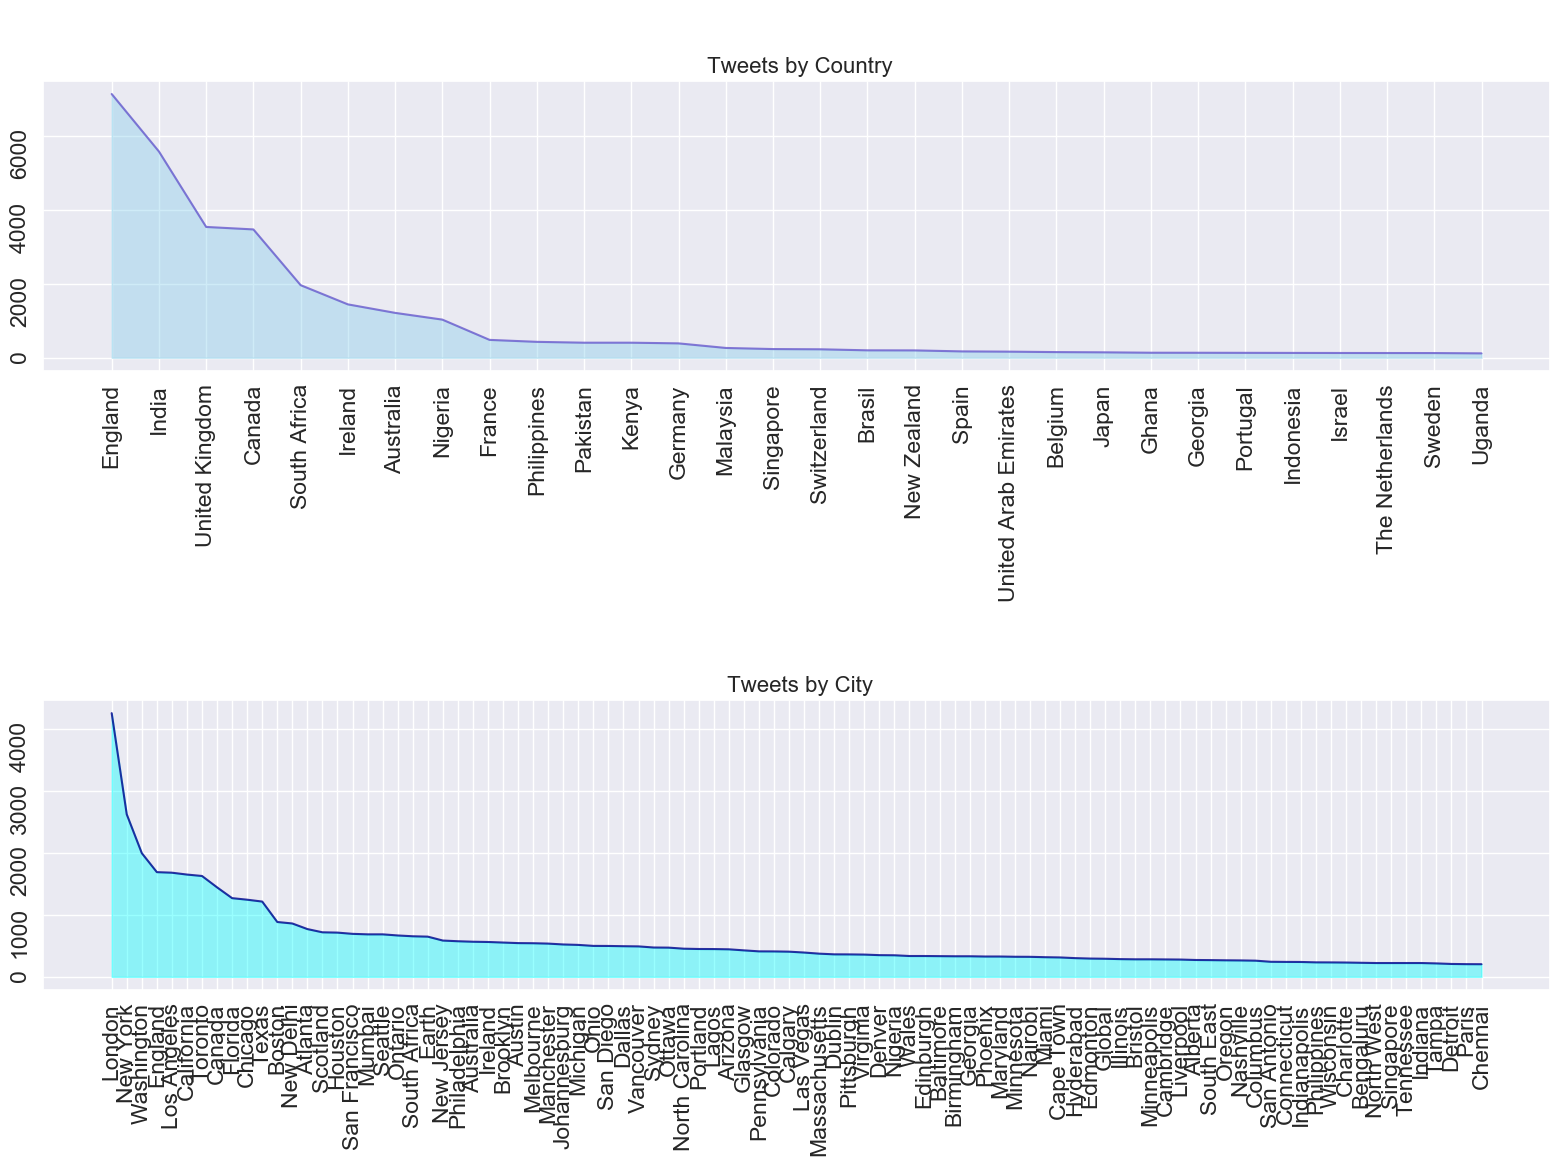

In [ ]:
# Tweets trend by Country and City
fig, (ax1, ax2) = plt.subplots(2, 1, squeeze=True, figsize=(16,12))

ax1.fill_between(top100_count.country, top100_count['# of tweets'], color="skyblue", alpha=0.4)
ax1.plot(top100_count.country, top100_count['# of tweets'], color="Slateblue", alpha=0.8)
ax1.set_title("\n\n Tweets by Country", fontsize=16)

ax2.fill_between(top100_city.city, top100_city['# of tweets'],  color="aqua", alpha=0.4)
ax2.plot(top100_city.city, top100_city['# of tweets'], color="darkblue", alpha=0.8)
ax2.set_title("\n\n Tweets by City", fontsize=16)

for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    
fig.tight_layout()
fig.savefig('plots//Tweets by country and city.png')
fig.show()

In [ ]:
# Create a heatmap using folium
def color(magnitude):
    if magnitude>=2000:
        col='red'
    elif (magnitude>=500 and magnitude<2000):
        col='beige'
    elif magnitude<500:
        col='green'
    return col

In [ ]:
def generateBaseMap(input_type,df,default_location=[40.693943, -73.985880], default_zoom_start=2):
    """
    Function to generate the heatmap

    Attributes
    ----------
    input_type : str
        Pass 'country' or 'city' to generate the respective heatmap
    df : str
        Name of the dataframe having the country/city coordinates and other details
    default_location : int
        Pass the default location for the displayed heatmap
    default_zoom_start: int
        Pass the default zoom for the displayed heatmap
         Methods
    -------
        Returns the base_map
    """
        
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    marker_cluster = plugins.MarkerCluster().add_to(base_map)
    
    HeatMap(data=df[['lat','long']].values.tolist(),radius=20,max_zoom=13).add_to(base_map)
    for lat,lan,tweet,name in zip(df['lat'],df['long'],df['# of tweets'],df.iloc[:,0]): 
        # Marker() takes location coordinates as a list as an argument 
        folium.Marker(location=[lat,lan],popup = [name,tweet], 
                      icon= folium.Icon(color=color(tweet), 
                      icon_color='white', icon='twitter', prefix='fa')).add_to(marker_cluster)
        #specify the min and max values of your data
    min, max = df['# of tweets'].min(), df['# of tweets'].max()
    colormap = cm.LinearColormap(colors=['green','beige','red'], vmin=min,vmax=max)
   
    colormap.caption = input_type.title() +' distribution of Covid-19/Vaccine tweets'
    colormap.add_to(base_map)
    return base_map

In [ ]:
generateBaseMap('country',top100_count)

In [ ]:
generateBaseMap('city',top100_city)

<h3> Tweet's Source</h3>

In [ ]:
# Compare the tweet source
top10_source = df_total.source.value_counts().nlargest(10)

In [ ]:
top10_source

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      65748
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    45632
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 45154
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        7830
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      3502
<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>                                 1517
<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>                      1391
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                    1011
<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>                         979
<a href="http://www.socialnewsdesk.com" rel="nofollow">SocialNewsDesk</a>                 727
Name: source, dtype: int64

In [ ]:
for source in top10_source.index:
    top10_source.index= top10_source.index.str.extract('(\>.*\<)', expand= False)

In [ ]:
for source in top10_source.index:
    top10_source.index= top10_source.index.str.extract('([a-zA-Z ]+)', expand= False)

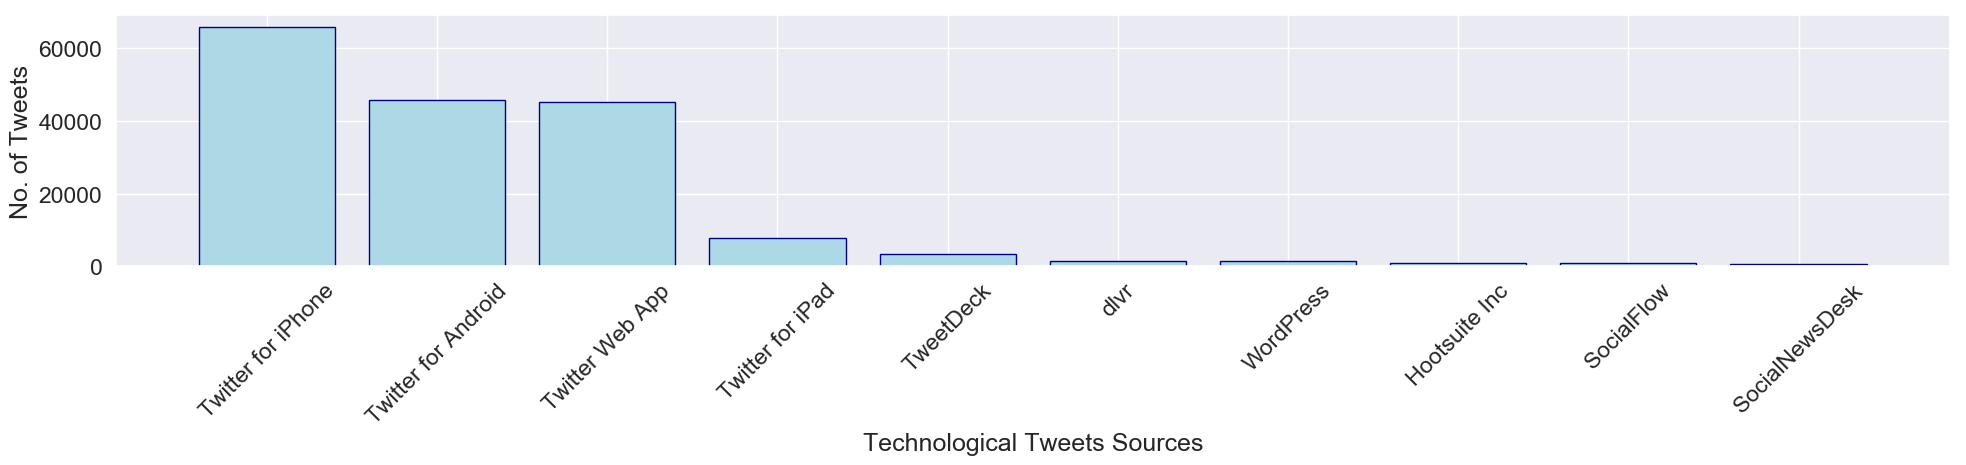

In [ ]:
fig = plt.figure(figsize = (20,5))
plt.bar(top10_source.index, top10_source.values, color="lightblue", edgecolor="darkblue")
plt.xlabel('Technological Tweets Sources')
plt.ylabel('No. of Tweets')
#plt.title("Tweets by source", fontsize=16);
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots//Tweets by source.jpeg", dpi=600)
plt.show()

<h3> Daily Tweets trend</h3>

In [ ]:
# Monthly tweet trend
df_total["month"] = df_total.month.apply(lambda x: 13 if x=='1-2021' else x)
monthly_tweets = df_total.groupby(['month'])['text'].count()

monthly_tweets

month
1     49357
4       774
5       699
6       616
7       502
8      1543
9      2241
10    13329
11    34175
12    77448
Name: text, dtype: int64

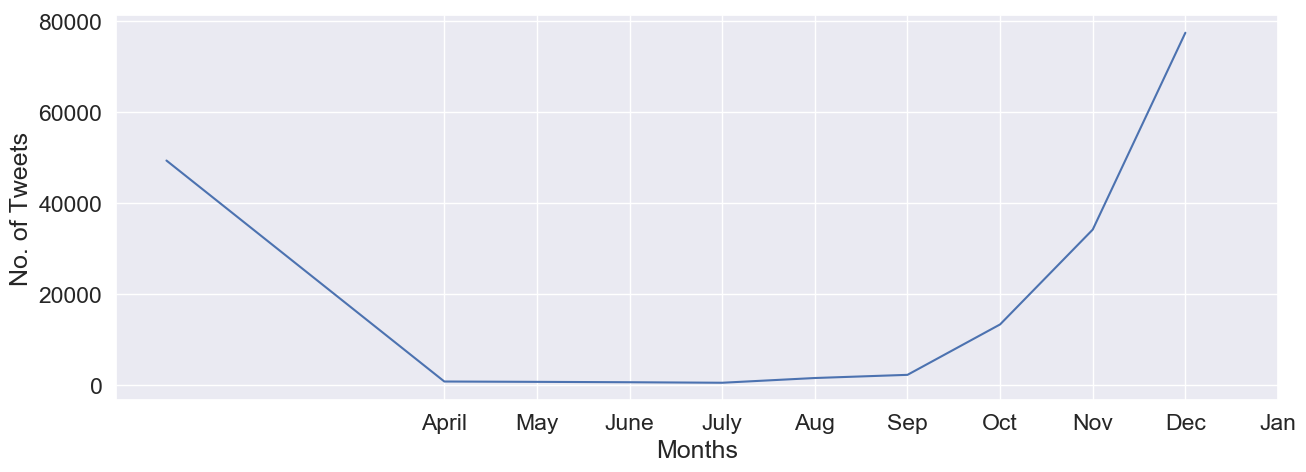

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(monthly_tweets.index,monthly_tweets.values)
#plt.title('Monthly Vaccine Tweets\' Trend', fontsize=16)
plt.xlabel('Months')
plt.ylabel('No. of Tweets')
plt.xticks([4,5,6,7,8,9,10,11,12,13], ['April', 'May','June','July','Aug','Sep','Oct','Nov','Dec','Jan'])
plt.savefig("plots//Monthly vaccine tweets trend.jpeg", dpi=600)
plt.show()

<h3> Sentiment </h3>

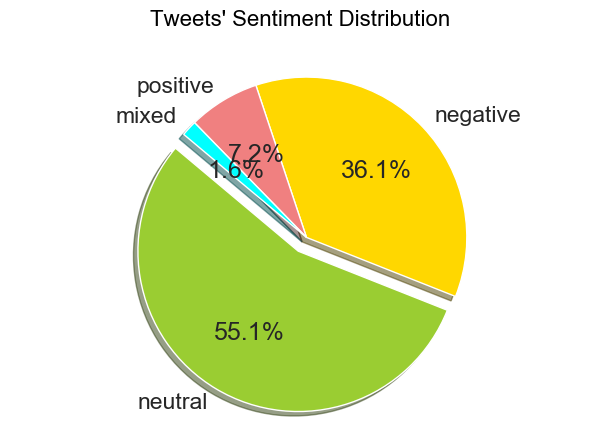

In [ ]:
# Show distribution of tweet sentiments
sentiment_dist = df_total.sent.value_counts()

plt.pie(sentiment_dist, labels=sentiment_dist.index, explode= (0.1,0,0,0),
        colors=['yellowgreen', 'gold', 'lightcoral','cyan'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Tweets\' Sentiment Distribution \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.savefig('plots//sentiment Score.png')
plt.show()

In [ ]:
# Function to filter top 10 tweets by sentiment
def top10AccountsBySentiment(sentiment):
    df = df_total.query("sent==@sentiment")
    top10 = df.groupby(by=["country"])['sent'].count().sort_values(ascending=False)[:10]
    return(top10)


C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


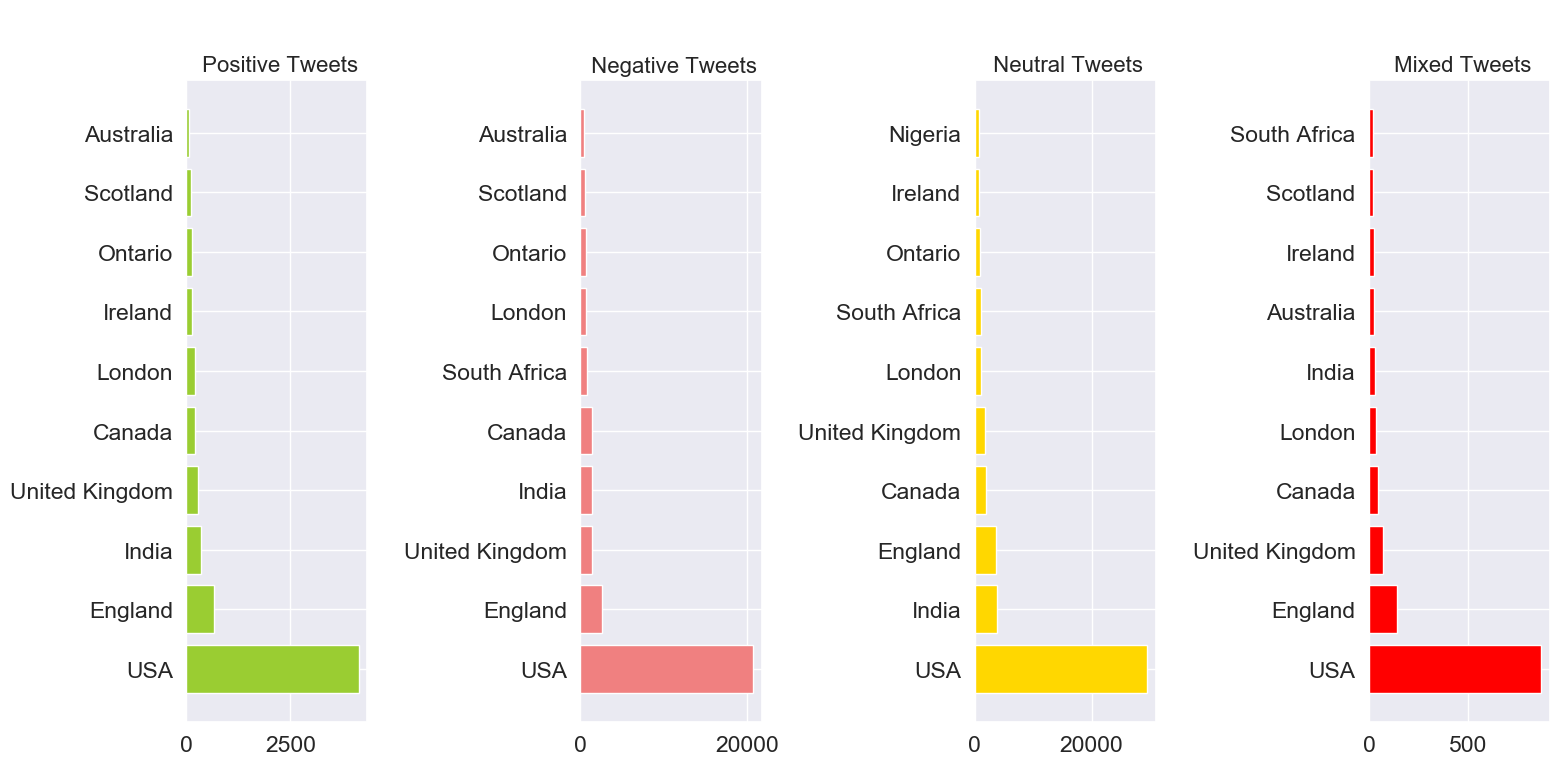

In [ ]:

# Top 10 tweets by each sentiment
top10_pos = top10AccountsBySentiment("positive")
top10_neg = top10AccountsBySentiment("negative")
top10_neu = top10AccountsBySentiment("neutral")
top10_mix= top10AccountsBySentiment("mixed")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, squeeze=True, figsize=(16,8))
#fig.suptitle('Top 10 Countries by Sentiment \n', fontsize=20)

ax1.barh(top10_pos.index, top10_pos.values, color='yellowgreen')
ax1.set_title("\n\n Positive Tweets", fontsize=16)

ax2.barh(top10_neg.index, top10_neg.values, color='lightcoral')
ax2.set_title("\n\n Negative Tweets", fontsize=16)

ax3.barh(top10_neu.index, top10_neu.values, color='gold')
ax3.set_title("\n\n Neutral Tweets", fontsize=16);

ax4.barh(top10_mix.index, top10_mix.values, color='red')
ax4.set_title("\n\n Mixed Tweets", fontsize=16);

fig.tight_layout()
plt.savefig("Plots//Top 10 countries by sentiment.jpeg", dpi=600)
fig.show()
